In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r'data_hse_project.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Проанализируйте столбцы. Что в них содержится? Опишите переменные. 
# Есть ли в данных пропуски? Обработайте пропуски. Если в какой-то колонке пропусков большинство, то ее можно удалить. 
# Если их не очень много, можно заполнить их медианой/средним или чем-нибудь еще, напишите почему вы выбрали тот или иной вариант.

# Шаг 4. Визуализация (максимум 20 баллов)
# Сделайте для своих данных разведочный анализ данных, Exploratory Data Analysis (EDA). Выясните, какие в данных есть особенности, визуализируйте их. Ваша задача — откопать в данных интересные закономерности и построить для них красивые, понятные визуализации, на основе которых можно выдвинуть гипотезы и создать для датасета новые переменные.

# Оценка за этот пункт зависит от сложности графиков и интересных идей, которые можно из них заметить.

# Описание переменных: 

## 1. MSSubClass: Класс здания
2. MSZoning: Общая зональная классификация
3. LotFrontage: Линейные футы улицы, подключенные к недвижимости
4. LotArea: Площадь участка в квадратных футах
5. Street: Тип доступа к дороге
6. Alley: Тип доступа к аллее
7. LotShape: Общая форма недвижимости
8. LandContour: Ровность участка
9. Utilities: Тип доступных коммунальных услуг
10. LotConfig: Конфигурация участка
11. LandSlope: Склон участка
12. Neighborhood: Физическое местоположение в пределах городских пределов Эймса
13. Condition1: Близость к основной дороге или железной дороге
14. Condition2: Близость к основной дороге или железной дороге (если присутствует вторая)
15. BldgType: Тип здания
16. HouseStyle: Стиль здания
17. OverallQual: Общее качество материала и отделки
18. OverallCond: Общая оценка состояния
19. YearBuilt: Оригинальная дата постройки
20. YearRemodAdd: Дата реконструкции
21. RoofStyle: Тип крыши
22. RoofMatl: Материал крыши
23. Exterior1st: Внешнее покрытие дома
24. Exterior2nd: Внешнее покрытие дома (если более одного материала)
25. MasVnrType: Тип облицовки стен
26. MasVnrArea: Площадь облицовки стен в квадратных футах
27. ExterQual: Качество внешнего материала
28. ExterCond: Текущее состояние материала снаружи
29. Foundation: Тип фундамента
30. BsmtQual: Высота подвала
31. BsmtCond: Общее состояние подвала
32. BsmtExposure: Выход на садовый уровень или на уровень подвала
33. BsmtFinType1: Качество отделки подвала
34. BsmtFinSF1: Площадь завершенного типа 1 в квадратных футах
35. BsmtFinType2: Качество второй отделки (если присутствует)
36. BsmtFinSF2: Площадь завершенного типа 2 в квадратных футах
37. BsmtUnfSF: Незаконченная площадь подвала в квадратных футах
38. TotalBsmtSF: Общая площадь подвала в квадратных футах
39. Heating: Тип отопления
40. HeatingQC: Качество и состояние отопления
41. CentralAir: Центральное кондиционирование воздуха
42. Electrical: Электрическая система
43. 1stFlrSF: Площадь первого этажа в квадратных футах
44. 2ndFlrSF: Площадь второго этажа в квадратных футах
45. LowQualFinSF: Площадь низкого качества отделки (на всех этажах)
46. GrLivArea: Жилая площадь над уровнем земли в квадратных футах
47. BsmtFullBath: Полные ванные комнаты в подвале
48. BsmtHalfBath: Полуполные ванные комнаты в подвале
49. FullBath: Полные ванные комнаты над уровнем земли
50. HalfBath: Полуванны над уровнем земли
51. Bedroom: Количество спален над уровнем подвала
52. Kitchen: Количество кухонь
53. KitchenQual: Качество кухни
54. TotRmsAbvGrd: Общее количество комнат над уровнем земли (не включая ванные комнаты)
55. Functional: Рейтинг функциональности дома
56. Fireplaces: Количество каминов
57. FireplaceQu: Качество камина
58. GarageType: Местоположение гаража
59. GarageYrBlt: Год постройки гаража
60. GarageFinish: Внутренняя отделка гаража
61. GarageCars: Размер гаража по вместимости автомобилей
62. GarageArea: Площадь гаража в квадратных футах
63. GarageQual: Качество гаража
64. GarageCond: Состояние гаража
65. PavedDrive: Выборка брусчатой дороги
66. WoodDeckSF: Площадь деревянной площадки в квадратных футах
67. OpenPorchSF: Площадь открытой веранды в квадратных футах
68. EnclosedPorch: Площадь закрытой веранды в квадратных футах
69. 3SsnPorch: Площадь трехсезонной веранды в квадратных футах
70. ScreenPorch: Площадь экранной веранды в квадратных футах
71. PoolArea: Площадь бассейна в квадратных футах
72. PoolQC: Качество бассейна
73. Fence: Качество забора
74. MiscFeature: Различные характеристики, не включенные в другие категории
75. MiscVal: Стоимость различных характеристик
76. MoSold: Проданный месяц
77. YrSold: Проданный год
78. SaleType: Тип продажи
79. SaleCondition: Состояние продажи
80. SalePrice: Цена продажи

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.dtypes.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype(

## Пропуски 

In [7]:
missing_data = dict(df.isna().sum()/len(df))
missing_data

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 0.1773972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 0.9376712328767123,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.5972602739726027,
 'MasVnrArea': 0.005479452054794521,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 0.025342465753424658,
 'BsmtCond': 0.025342465753424658,
 'BsmtExposure': 0.026027397260273973,
 'BsmtFinType1': 0.025342465753424658,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 0.026027397260273973,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0006849315068493151,
 '

In [8]:
# функция для удаления признаков, где доля пропусков больше 0.7

In [9]:
def delete_na(col):
    if (col.isna().sum() / len(col)) >= 0.7:  
        return None  # Возвращаем None, чтобы позже удалить столбцы с помощью dropna
    else:
        return col




In [10]:
df = df.apply(delete_na, axis=0)
df = df.dropna(axis=1, how='all')  
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
missing_data_filtered = {k: v for k, v in missing_data.items() if v > 0 and v<0.7}
missing_data_filtered

{'LotFrontage': 0.1773972602739726,
 'MasVnrType': 0.5972602739726027,
 'MasVnrArea': 0.005479452054794521,
 'BsmtQual': 0.025342465753424658,
 'BsmtCond': 0.025342465753424658,
 'BsmtExposure': 0.026027397260273973,
 'BsmtFinType1': 0.025342465753424658,
 'BsmtFinType2': 0.026027397260273973,
 'Electrical': 0.0006849315068493151,
 'FireplaceQu': 0.4726027397260274,
 'GarageType': 0.05547945205479452,
 'GarageYrBlt': 0.05547945205479452,
 'GarageFinish': 0.05547945205479452,
 'GarageQual': 0.05547945205479452,
 'GarageCond': 0.05547945205479452}

In [12]:
# исследуем пропуски

In [13]:
# Начнем с FireplaceQu

In [14]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [15]:
set(df[df["FireplaceQu"].isna()]["Fireplaces"])

{0}

In [16]:
# как мы видим пропуски только у тех зданий, где нет камиенов, поэтому заменим NA на "NA"

In [17]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")

In [18]:
# теперь с "GarageYrBlt"

In [19]:
df[df["GarageYrBlt"].isna()]["YearBuilt"].tolist()

[1955,
 1920,
 1968,
 1915,
 1994,
 1959,
 1919,
 1935,
 1930,
 1971,
 2004,
 1924,
 1956,
 1940,
 1912,
 1925,
 1945,
 1940,
 1971,
 1912,
 1920,
 1922,
 1910,
 1941,
 1920,
 1972,
 1955,
 1978,
 1920,
 1900,
 1920,
 1946,
 1910,
 1940,
 1990,
 2007,
 1972,
 1914,
 1914,
 1936,
 1910,
 1970,
 1930,
 1935,
 1987,
 1910,
 1914,
 1924,
 1961,
 1900,
 1977,
 1975,
 1958,
 1910,
 1949,
 1923,
 1926,
 1965,
 1916,
 1970,
 1914,
 1947,
 1991,
 1875,
 1959,
 1946,
 1954,
 1947,
 1971,
 1911,
 1922,
 1971,
 1940,
 1922,
 1931,
 1941,
 1872,
 1985,
 1970,
 1974,
 2006]

In [20]:
# Как мы видим нет пропусков у того, когда построили Дом. Логично предположить, что и гараж был построен в это же время

In [21]:
df.loc[df["GarageYrBlt"].isna(),"GarageYrBlt"] = df["YearBuilt"]

In [22]:
# Теперь с MasVnrType

In [23]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [24]:
df[df["MasVnrType"].isna()]["MasVnrArea"].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [25]:
# там где, площадь 0 - нет облицовки, следовательно заменим на "NA"

In [26]:
df.loc[(df["MasVnrArea"] == 0) & (df["MasVnrType"].isna()), "MasVnrType"] = "NA"

In [27]:
df[df["MasVnrType"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,...,200,0,0,0,0,3,2007,WD,Alloca,200624
624,625,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,147,0,0,11,2006,WD,Normal,165150
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,205950
773,774,20,RL,70.0,10150,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2007,COD,Normal,114500
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2007,New,Partial,199900
1230,1231,90,RL,NaN,18890,Pave,IR1,Lvl,AllPub,Inside,...,145,0,0,0,8300,8,2007,WD,Normal,190000
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,New,Partial,465000


In [28]:
# заполним остальные пропуски вероятностно

In [29]:
probabilities = [445 / (445 + 128 + 15), 128 / (445 + 128 + 15), 15 / (445 + 128 + 15)]
df["MasVnrType"] = df["MasVnrType"].fillna(pd.Series(np.random.choice(["BrkFace", "Stone", "BrkCmn"], p=probabilities, size=len(df))))

In [30]:
# Теперь MasVnrArea

In [31]:
df[df['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,...,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2008,WD,Normal,237000


In [32]:
# остальное средними заполним

In [33]:
df['MasVnrArea'] = df['MasVnrArea'].fillna('mean')

In [34]:
# теперь Electrical

In [35]:
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [36]:
# Здесь сильный дисбаланс, поэтому просто модой заменим

In [37]:
mode_value = df["Electrical"].mode()[0]

df["Electrical"] = df["Electrical"].fillna(mode_value)

In [38]:
# Теперь LotFrontage

In [39]:
# LotFrontage - длина дорожки до улицы. Логично предположить, что она зависит от района, где расположен дом. Покажем это

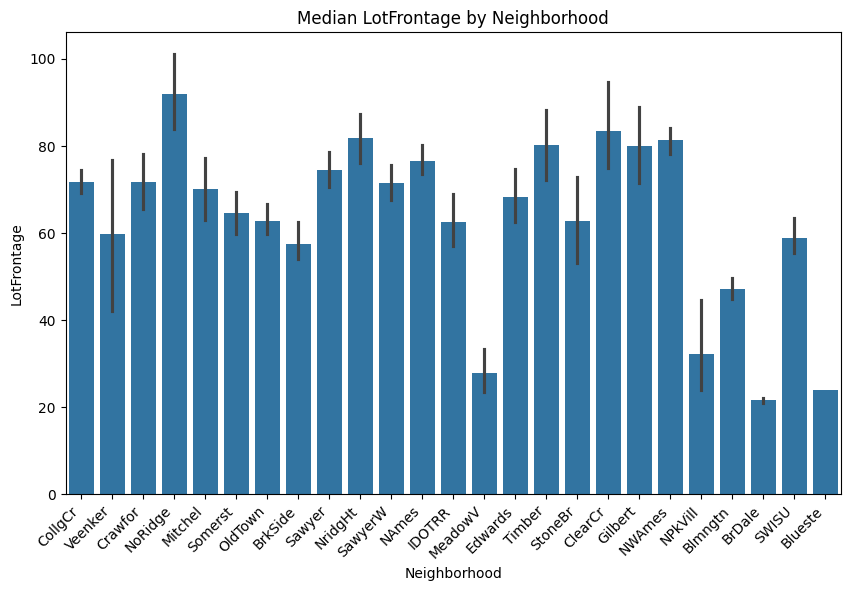

In [40]:
filtered_data = df[~df["LotFrontage"].isna()]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x="Neighborhood", y="LotFrontage", estimator=np.mean)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Neighborhood")
plt.ylabel("LotFrontage")
plt.title("Median LotFrontage by Neighborhood")

plt.show()

In [41]:
# заменем на медиану из-за выбросов - std = 24

In [42]:
median_frontage_by_neighborhood = df.groupby('Neighborhood')['LotFrontage'].transform('median')

df['LotFrontage'] = df['LotFrontage'].fillna(median_frontage_by_neighborhood)


In [43]:
# 'BsmtQual'
#  'BsmtCond'
#  'BsmtExposure' 
#  'BsmtFinType1'
#  'BsmtFinType2' - теперь эти

In [44]:
print(df["BsmtQual"].value_counts())
print(df["BsmtCond"].value_counts())
print(df["BsmtExposure"].value_counts())
print(df["BsmtFinType1"].value_counts())
print(df["BsmtFinType2"].value_counts())


BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


In [45]:
# заполним модой те, в которых дисбаланс классов

In [46]:
mode_BsmtFinType2 = df['BsmtFinType2'].mode()[0]
mode_BsmtExposure = df['BsmtExposure'].mode()[0]
mode_BsmtCond = df['BsmtCond'].mode()[0]


df["BsmtFinType2"] = df["BsmtFinType2"].fillna(mode_BsmtFinType2)
df["BsmtExposure"] = df["BsmtExposure"].fillna(mode_BsmtExposure)
df["BsmtCond"] = df["BsmtCond"].fillna(mode_BsmtCond)

In [47]:
# остальные заполним вероятностно

In [48]:
probabilities = [649 / (649 + 618 + 121+35), 618 / (649 + 618 + 121+35), 121 / (649 + 618 + 121+35), 35 / (649 + 618 + 121+35)]
df["BsmtQual"] = df["BsmtQual"].fillna(pd.Series(np.random.choice(["TA", "Gd", "Ex", "Fa"], p=probabilities, size=len(df))))

In [49]:
probabilities = [430 / (430 + 418 + 220+148+133+74), 418 / (430 + 418 + 220+148+133+74), 220 / (430 + 418 + 220+148+133+74), 148 / (430 + 418 + 220+148+133+74), 133 / (430 + 418 + 220+148+133+74), 74 / (430 + 418 + 220+148+133+74)]
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(pd.Series(np.random.choice(["Unf", "GLQ", "ALQ", "BLQ","Rec","LwQ"], p=probabilities, size=len(df))))

In [50]:
# 'GarageType'
#  'GarageFinish'
#  'GarageQual'
#  'GarageCond - теперь эти

In [51]:
print(df["GarageType"].value_counts())
print(df["GarageFinish"].value_counts())
print(df["GarageQual"].value_counts())
print(df["GarageCond"].value_counts())

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


In [52]:
# заполним модой те, в которых дисбаланс классов

In [53]:
mode_GarageQual = df['GarageQual'].mode()[0]
mode_GarageCond = df['GarageCond'].mode()[0]

df["GarageQual"] = df["GarageQual"].fillna(mode_GarageQual)
df["GarageCond"] = df["GarageCond"].fillna(mode_GarageCond)

In [54]:
# остальные заполним вероятностно

In [55]:
probabilities = [870 / (870 + 387 + 88+19+9+6), 387 / (870 + 387 + 88+19+9+6), 88 / (870 + 387 + 88+19+9+6), 19 / (870 + 387 + 88+19+9+6),9 / (870 + 387 + 88+19+9+6),6 / (870 + 387 + 88+19+9+6)]
df["GarageType"] = df["GarageType"].fillna(pd.Series(np.random.choice(["Attchd", "Detchd", "BuiltIn", "Basment", "CarPort", "2Types"], p=probabilities, size=len(df))))

In [56]:
probabilities = [605 / (605 + 422 + 352), 422 / (605 + 422 + 352), 352 / (605 + 422 + 352)]
df["GarageFinish"] = df["GarageFinish"].fillna(pd.Series(np.random.choice(["Unf", "RFn", "Fin"], p=probabilities, size=len(df))))

In [57]:
df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# EDA

In [58]:
# посмотрим на таргет - цена продажи

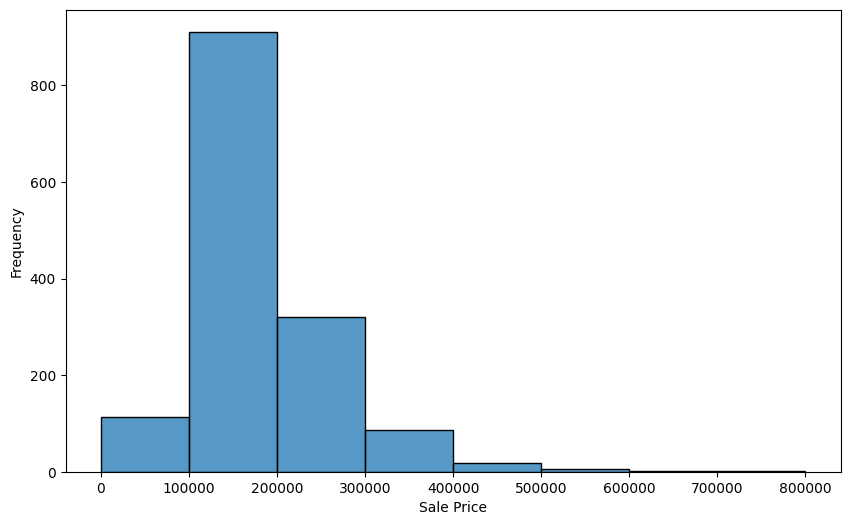

In [59]:
filtered_data = df[~df["SalePrice"].isna()]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="SalePrice", bins=range(0, 800001, 100000))

plt.xlabel("Sale Price")
plt.ylabel("Frequency")

plt.show()

Как видно данные скошены вправо

**Гипотеза**

большинство домов продается по относительно низким или средним ценам, меньшая доля объектов продается по более высоким ценам, причина может быть связана с тем, что элитные(дорогие) дома составляют небольшой процент всех объектов недвижимости 


In [60]:
median_price = filtered_data["SalePrice"].median()

below_median = filtered_data[filtered_data["SalePrice"] <= median_price]["SalePrice"]
above_median = filtered_data[filtered_data["SalePrice"] > median_price]["SalePrice"]

t_stat, p_value = stats.ttest_ind(below_median, above_median)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

t-статистика: -37.417360799991656
p-значение: 2.387755714977168e-215


**Интерпретация:**

t-статистика: Отрицательная t-статистика указывает на то, что средняя цена в "группе ниже медианы" значительно меньше средней цены в "группе выше медианы". Чем больше по абсолютной величине значение t-статистики, тем сильнее различие между средними значениями групп.

p-значение: Очень маленькое p-значение (практически нулевое) говорит о том, что вероятность того, что наблюдаемое различие между средними значениями групп произошло случайно, крайне мала. Отвергаем нулевую гипотезу, которая предполагает, что между средними значениями групп нет значимого различия.


Результаты t-теста показывают, что средняя цена в группе ниже медианы значительно меньше средней цены в группе выше медианы, и это различие статистически значимо (p-значение практически равно нулю). Это подтверждает вашу гипотезу о том, что данные о ценах на продажу недвижимости скошены вправо.

In [61]:
# посмотрим на корреляции

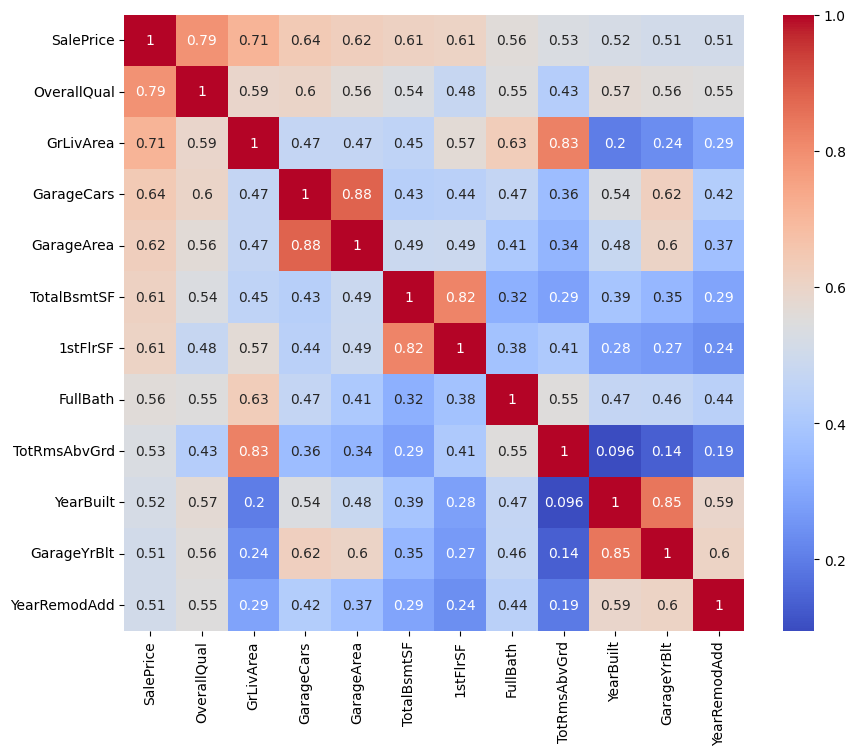

In [62]:
numeric_vars = df.select_dtypes(include=[np.number]).columns

all_numeric_vars = df[numeric_vars]

cor_numeric_vars = all_numeric_vars.corr()

cor_sorted_saleprice = cor_numeric_vars['SalePrice'].sort_values(ascending=False)

high_corr_indices = cor_sorted_saleprice[abs(cor_sorted_saleprice) > 0.5].index
cor_high = cor_numeric_vars.loc[high_corr_indices, high_corr_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(cor_high, annot=True, cmap='coolwarm')
plt.show()

In [63]:
# видим, что у OverallQual - имеют самую большую корреляцию.
# Исследуем этот признак

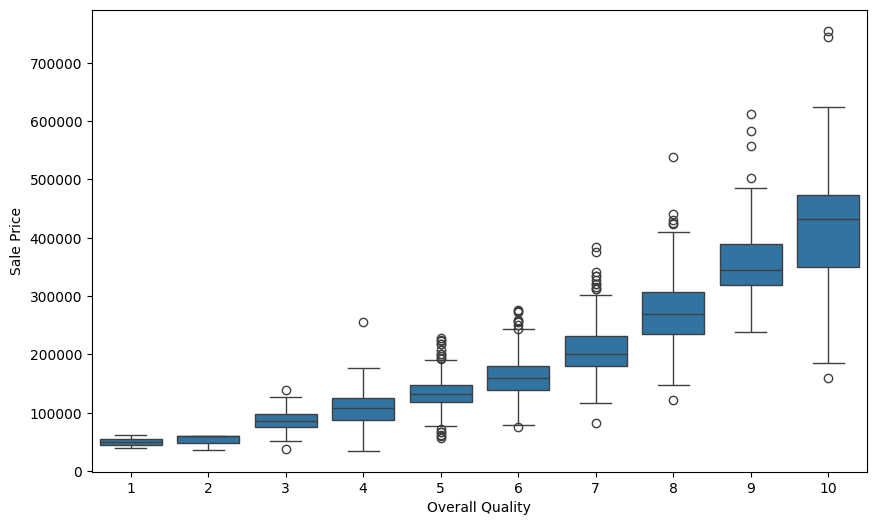

In [64]:
filtered_data = df[~df["SalePrice"].isna()]

plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=filtered_data)

plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")

plt.show()

In [65]:
# видим некоторые выбросы - уберем их

In [66]:
q1 = df.groupby('OverallQual')['SalePrice'].quantile(0.25)
q3 = df.groupby('OverallQual')['SalePrice'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[~((df['SalePrice'] < lower_bound[df['OverallQual']].values) |
                               (df['SalePrice'] > upper_bound[df['OverallQual']].values))]


In [67]:
# видим, что у GrLivArea - имеют топ-2 корреляцию.
# Исследуем этот признак

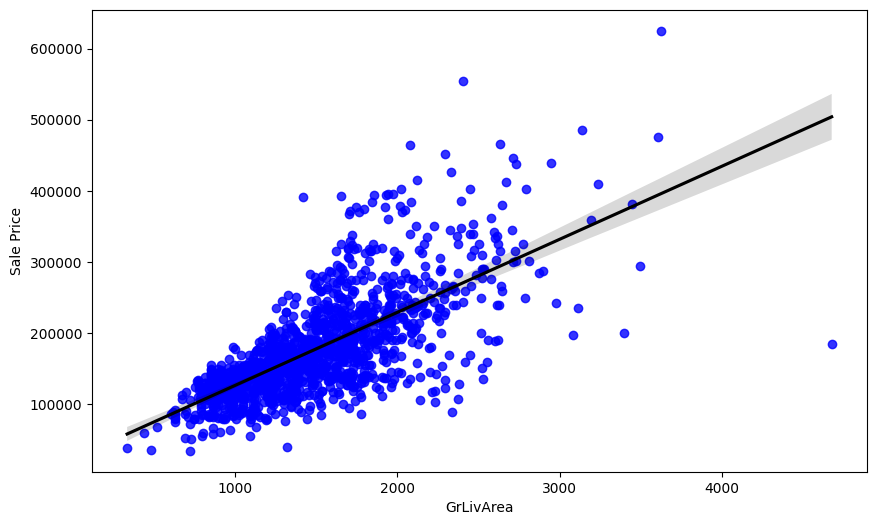

In [68]:
filtered_data = df[~df["SalePrice"].isna()]

plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=filtered_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})


plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")

plt.show()


In [69]:
# тоже видим некоторые выбросы - уберем их

In [70]:
df = df[(df['GrLivArea'] < 4000) & (df['SalePrice'] < 600000)]


# FEATURE ENGINEERING 

In [71]:
df['TotalBathrooms'] = df['FullBath'] + (df['HalfBath'] * 0.5) + df['BsmtFullBath'] + (df['BsmtHalfBath'] * 0.5)


In [72]:
df['Remod'] = np.where(df['YearBuilt'] == df['YearRemodAdd'], 0, 1)

In [73]:
df['HouseAge'] = df['YrSold'].astype(int) - df['YearRemodAdd']

In [74]:
df['IsNew'] = np.where(df['YrSold'] == df['YearBuilt'], 1, 0)

In [75]:
df['TotalSqFeet'] = df['GrLivArea'] + df['TotalBsmtSF']

In [76]:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [77]:
drop_vars = ['YearRemodAdd', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'TotalBsmtSF', 'BsmtFinSF1','Id']

df = df.drop(columns=drop_vars)

In [78]:
numeric_vars = df.select_dtypes(include=['number']).columns
numeric_var_names = list(numeric_vars)
numeric_var_names = [i for i in numeric_var_names if i!='SalePrice']

include_vars = ['HouseAge', 'TotalPorchSF', 'TotalBathrooms', 'TotalSqFeet']
numeric_var_names = [var for var in numeric_var_names]
numeric_var_names.extend(include_vars)

df_num = df[numeric_var_names]

df_cat = df.drop(columns=numeric_var_names + ['SalePrice',"MasVnrArea"])

cat_names = df_cat.columns.tolist()